<a href="https://colab.research.google.com/github/j0h4nM/ciencia_de_datos-/blob/main/final_lol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

API_KEY = "RGAPI-4499bbbc-188f-40a0-80b7-e6822f127805"
gameName = "Nanchø"
tagLine = "LAN"

headers = {
    "X-Riot-Token": API_KEY
}

# Paso 1: Obtener el PUUID desde Riot ID (usa "americas")
account_url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{gameName}/{tagLine}"
account_response = requests.get(account_url, headers=headers)

if account_response.status_code == 200:
    account_data = account_response.json()
    puuid = account_data['puuid']
    print("✅ PUUID obtenido:", puuid)

    # Paso 2: Obtener el nombre correcto desde Riot Account API por PUUID
    puuid_url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-puuid/{puuid}"
    puuid_response = requests.get(puuid_url, headers=headers)

    if puuid_response.status_code == 200:
        puuid_data = puuid_response.json()
        invocador_name = puuid_data.get('gameName')
        invocador_tag = puuid_data.get('tagLine')
        print("\n✅ Datos del invocador desde Riot Account API:")
        print(f"Nombre: {invocador_name}")
        print(f"Tag: {invocador_tag}")


    # Paso 3: Obtener nivel e ID desde Summoner API por PUUID (usa 'la1')
    region = "la1"
    summoner_url = f"https://{region}.api.riotgames.com/lol/summoner/v4/summoners/by-puuid/{puuid}"
    summoner_response = requests.get(summoner_url, headers=headers)

    if summoner_response.status_code == 200:
        summoner_data = summoner_response.json()
        invocador_level = summoner_data.get('summonerLevel')
        invocador_id = summoner_data.get('id')

        print("\n✅ Datos adicionales desde Summoner API:")
        print(f"Nombre confirmado: {invocador_name}")
        print(f"Nivel: {invocador_level}")
        print(f"ID de invocador: {invocador_id}")



✅ PUUID obtenido: I2oYWWRV6nwqBkpAXuVWkM8_E0tTpaaVsIKZeYmvN_9UuOFWdgfmjmd7XRfuVqQzYIAPYz7HyH9arA

✅ Datos del invocador desde Riot Account API:
Nombre: Nanchø
Tag: LAN

✅ Datos adicionales desde Summoner API:
Nombre confirmado: Nanchø
Nivel: 379
ID de invocador: 80Z6n9KXgkbqDgi-Zx-sYhuehiSjjGAH0uFIqXmu58r05Jg


<Figure size 1200x500 with 0 Axes>

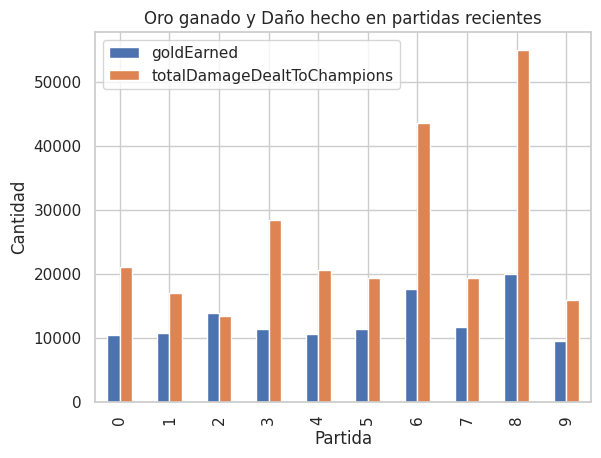

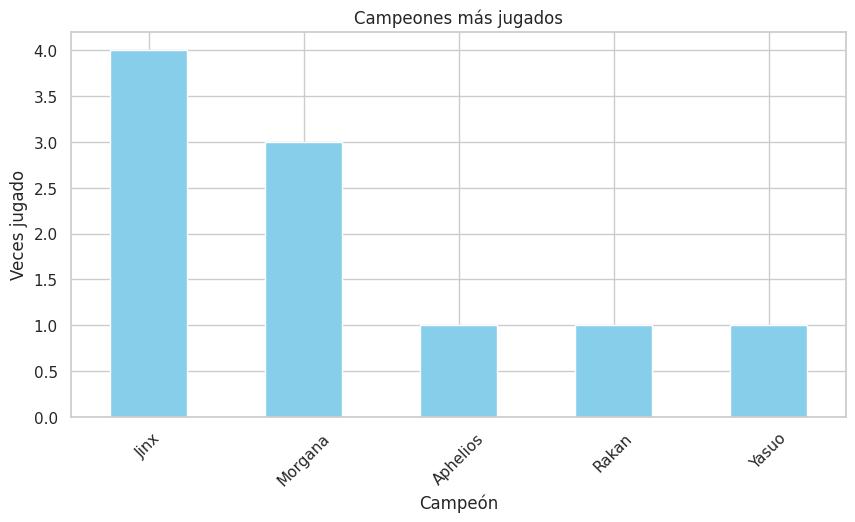


Resumen de partidas recientes:


,championName,kills,deaths,assists,goldEarned,totalDamageDealtToChampions,KDA
0,Aphelios,11,6,28,10326,21060,6.500000
1,Yasuo,9,9,25,10661,16958,3.777778
2,Rakan,2,8,32,13888,13336,4.250000
3,Morgana,5,6,13,11326,28345,3.000000
4,Morgana,5,8,17,10518,20495,2.750000
5,Morgana,5,6,18,11259,19381,3.833333
6,Jinx,14,11,8,17644,43608,2.000000
7,Jinx,7,7,7,11660,19339,2.000000
8,Jinx,21,7,6,19870,55041,3.857143
9,Jinx,3,4,1,9395,15915,1.000000


In [ ]:
# Librerías necesarias
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Configuración inicial
API_KEY = "RGAPI-4499bbbc-188f-40a0-80b7-e6822f127805"
gameName = "Nanchø"
tagLine = "LAN"
headers = {"X-Riot-Token": API_KEY}

# Paso 1: Obtener PUUID
account_url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{gameName}/{tagLine}"
account_response = requests.get(account_url, headers=headers)
account_data = account_response.json()
puuid = account_data['puuid']

# Paso 2: Obtener datos del invocador
region = "la1"
summoner_url = f"https://{region}.api.riotgames.com/lol/summoner/v4/summoners/by-puuid/{puuid}"
summoner_data = requests.get(summoner_url, headers=headers).json()
invocador_id = summoner_data['id']

# Paso 3: Obtener últimas 10 partidas
matchlist_url = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=10"
match_ids = requests.get(matchlist_url, headers=headers).json()

# Paso 4: Extraer datos de partidas
matches_data = []
for match_id in match_ids:
    match_url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}"
    match_data = requests.get(match_url, headers=headers).json()
    for player in match_data['info']['participants']:
        if player['puuid'] == puuid:
            matches_data.append(player)
            break

# Convertir a DataFrame
matches_df = pd.DataFrame(matches_data)

# Visualización 1: KDA, oro ganado, daño hecho
kda = (matches_df['kills'] + matches_df['assists']) / matches_df['deaths'].replace(0, 1)
matches_df['KDA'] = kda

plt.figure(figsize=(12, 5))
matches_df[['goldEarned', 'totalDamageDealtToChampions']].plot(kind='bar')
plt.title('Oro ganado y Daño hecho en partidas recientes')
plt.xlabel('Partida')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

# Visualización 2: Campeones más jugados
plt.figure(figsize=(10, 5))
matches_df['championName'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Campeones más jugados')
plt.xlabel('Campeón')
plt.ylabel('Veces jugado')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualización 3: Tabla resumen de partidas
summary_cols = ['championName', 'kills', 'deaths', 'assists', 'goldEarned', 'totalDamageDealtToChampions', 'KDA']
print("\nResumen de partidas recientes:")
display(matches_df[summary_cols])



In [ ]:
# ANALISIS DE 100 PARTIDAS SOLO/DUO DE "Nanchø"

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# ----------------------------
# CONFIGURACIONES INICIALES
# ----------------------------
API_KEY = "RGAPI-4499bbbc-188f-40a0-80b7-e6822f127805"
GAME_NAME = "Nanchø"
TAG_LINE = "LAN"
HEADERS = {"X-Riot-Token": API_KEY}

# ----------------------------
# FUNCIONES DE LA API
# ----------------------------
def get_puuid(game_name, tag_line):
    url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{game_name}/{tag_line}"
    r = requests.get(url, headers=HEADERS)
    return r.json().get("puuid") if r.status_code == 200 else None

def get_match_ids(puuid, count=100):
    url = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?queue=420&count={count}"
    r = requests.get(url, headers=HEADERS)
    return r.json() if r.status_code == 200 else []

def get_match_data(match_id):
    url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}"
    r = requests.get(url, headers=HEADERS)
    return r.json() if r.status_code == 200 else None

# ----------------------------
# EXTRAER DATOS DEL JUGADOR
# ----------------------------
puuid = get_puuid(GAME_NAME, TAG_LINE)
match_ids = get_match_ids(puuid)

# ----------------------------
# EXTRAER DATOS DE CADA PARTIDA
# ----------------------------
data = []
print("Descargando datos de partidas...")
for match_id in match_ids:
    match = get_match_data(match_id)
    time.sleep(1.2)  # evitar rate limit
    if match:
        for p in match['info']['participants']:
            if p['puuid'] == puuid:
                data.append({
                    "champion": p['championName'],
                    "kills": p['kills'],
                    "deaths": p['deaths'],
                    "assists": p['assists'],
                    "win": p['win'],
                    "role": p['teamPosition'],
                    "gold": p['goldEarned'],
                    "cs": p['totalMinionsKilled'] + p['neutralMinionsKilled'],
                    "damage": p['totalDamageDealtToChampions'],
                    "duration_min": match['info']['gameDuration'] / 60,
                    "game_end": pd.to_datetime(match['info']['gameEndTimestamp'], unit='ms')
                })

# ----------------------------
# DATAFRAME Y ANALISIS
# ----------------------------
df = pd.DataFrame(data)
df['KDA'] = (df['kills'] + df['assists']) / df['deaths'].replace(0, 1)

# Estadísticas descriptivas
print("\n--- Estadísticas Generales ---")
print(df.describe())
print("\nWinrate:", df['win'].mean()*100, "%")
print("\nCampeones más usados:")
print(df['champion'].value_counts().head())

# ----------------------------
# VISUALIZACIONES
# ----------------------------
sns.set(style="whitegrid")


Descargando datos de partidas...

--- Estadísticas Generales ---
            kills      deaths     assists          gold          cs  \
count  100.000000  100.000000  100.000000    100.000000  100.000000   
mean     6.430000    6.350000    9.480000  10441.840000   82.310000   
min      0.000000    0.000000    0.000000    500.000000    0.000000   
25%      3.000000    4.000000    4.000000   8575.250000   36.000000   
50%      5.000000    6.500000    7.500000  10442.500000   63.000000   
75%      8.000000    9.000000   13.000000  12654.500000  118.250000   
max     32.000000   14.000000   33.000000  27569.000000  301.000000   
std      5.691133    3.596786    7.295329   4701.568764   62.298028   

            damage  duration_min                       game_end         KDA  
count    100.00000    100.000000                            100  100.000000  
mean   19815.00000     30.343667  2024-10-11 08:22:40.626620160    3.100313  
min        0.00000      1.716667     2024-02-11 15:52:37.1860

In [ ]:
from collections import Counter

# Filtrar solo las partidas ganadas
df_wins = df[df['win']]

# Extraer todos los ítems de partidas ganadas en una sola lista
items_flat = [item for sublist in df_wins['items'] for item in sublist if item != 0]

# Contar la frecuencia de cada ítem
item_counts = Counter(items_flat)

# Crear un DataFrame con los resultados
item_freq_df = pd.DataFrame(item_counts.items(), columns=["item_id", "count"])
item_freq_df["item_name"] = item_freq_df["item_id"].map(item_id_to_name)
item_freq_df = item_freq_df.sort_values("count", ascending=False)

# Mostrar los 10 ítems más comunes
print("\n--- Ítems más comunes en victorias ---")
print(item_freq_df.head(10))



--- Ítems más comunes en victorias ---
    item_id  count        item_name
2      3871     17              NaN
3      3157     14              NaN
41     3020     12              NaN
0      6653     11              NaN
7      3006     11              NaN
5      1052     10  Amplifying Tome
34     3877      9              NaN
32     3179      8              NaN
12     3031      7              NaN
35     6699      7              NaN


<Figure size 1200x500 with 0 Axes>

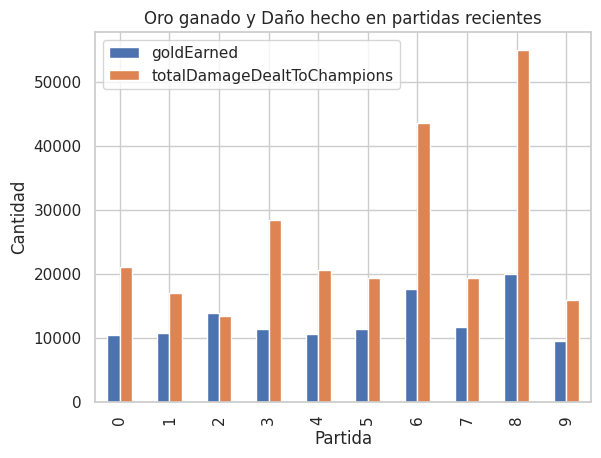

In [ ]:
# Visualización 1: KDA, oro ganado, daño hecho
kda = (matches_df['kills'] + matches_df['assists']) / matches_df['deaths'].replace(0, 1)
matches_df['KDA'] = kda

plt.figure(figsize=(12, 5))
matches_df[['goldEarned', 'totalDamageDealtToChampions']].plot(kind='bar')
plt.title('Oro ganado y Daño hecho en partidas recientes')
plt.xlabel('Partida')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

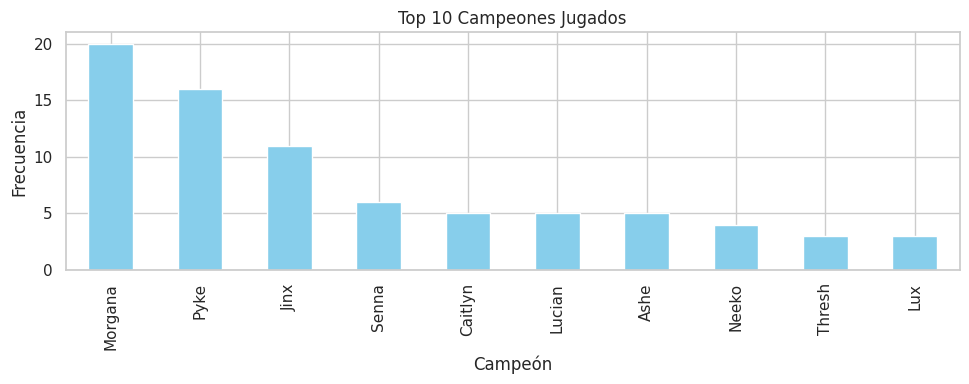

In [ ]:
# Campeones más jugados
plt.figure(figsize=(10,4))
df['champion'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Campeones Jugados")
plt.xlabel("Campeón")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

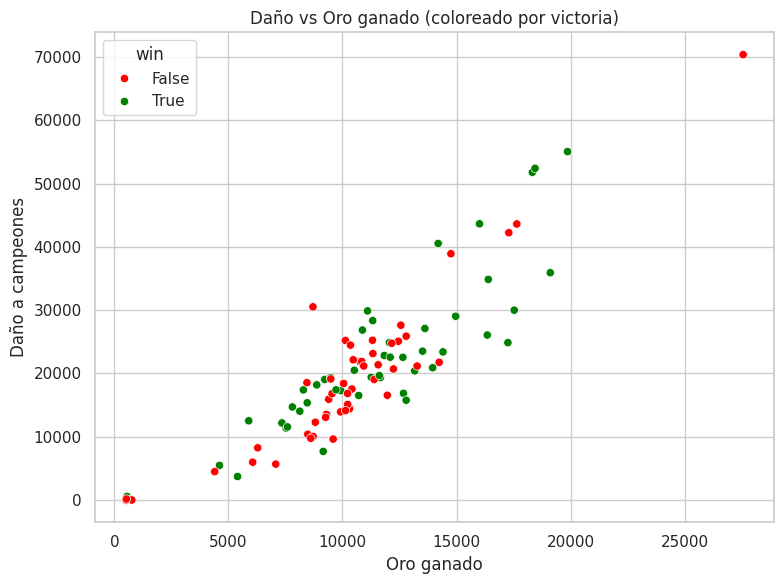

In [ ]:

# 1. Daño vs Oro ganado
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="gold", y="damage", hue="win", palette={True: "green", False: "red"})
plt.title("Daño vs Oro ganado (coloreado por victoria)")
plt.xlabel("Oro ganado")
plt.ylabel("Daño a campeones")
plt.tight_layout()
plt.show()

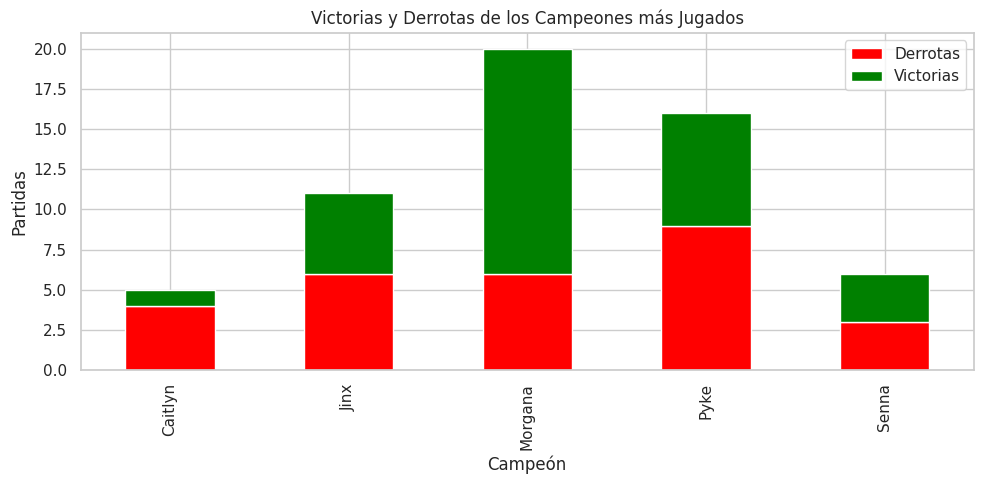

In [ ]:
# 2. Victorias y derrotas por campeón más jugado
top_champs = df['champion'].value_counts().head(5).index
df_top = df[df['champion'].isin(top_champs)]
victorias_derrotas = df_top.groupby(['champion', 'win']).size().unstack().fillna(0)

victorias_derrotas.plot(kind='bar', stacked=True, figsize=(10, 5), color=["red", "green"])
plt.title("Victorias y Derrotas de los Campeones más Jugados")
plt.xlabel("Campeón")
plt.ylabel("Partidas")
plt.legend(["Derrotas", "Victorias"])
plt.tight_layout()
plt.show()


<ipython-input-6-b60c32e46fbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="role", y="damage", palette="coolwarm", order=orden_roles)


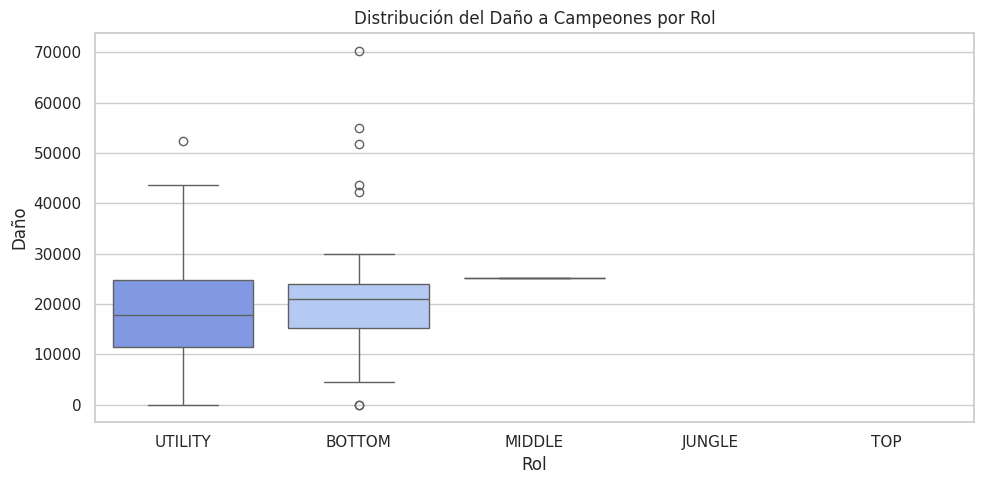

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Distribución de daño por rol
plt.figure(figsize=(10, 5))
orden_roles = ["UTILITY", "BOTTOM", "MIDDLE", "JUNGLE", "TOP"]
sns.boxplot(data=df, x="role", y="damage", palette="coolwarm", order=orden_roles)
plt.title("Distribución del Daño a Campeones por Rol")
plt.ylabel("Daño")
plt.xlabel("Rol")
plt.tight_layout()
plt.show()


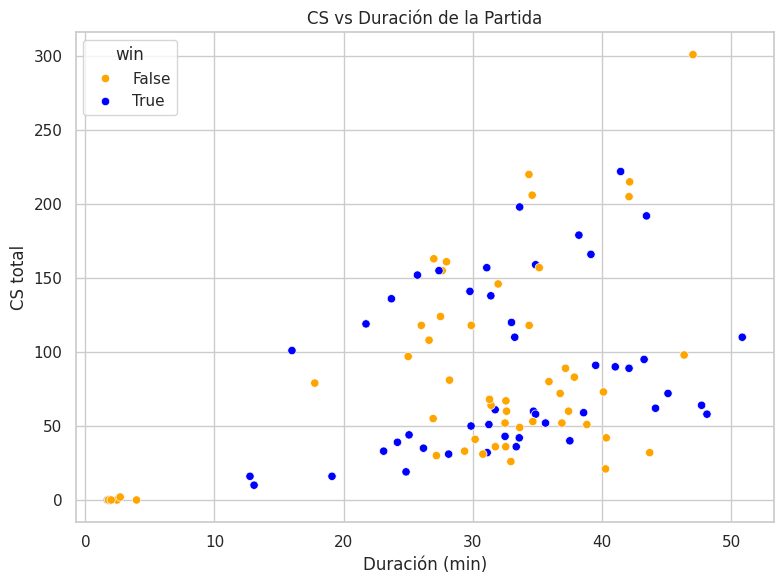

In [ ]:
# 4. Relación CS (minions) vs Duración de la partida
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="duration_min", y="cs", hue="win", palette={True: "blue", False: "orange"})
plt.title("CS vs Duración de la Partida")
plt.xlabel("Duración (min)")
plt.ylabel("CS total")
plt.tight_layout()
plt.show()

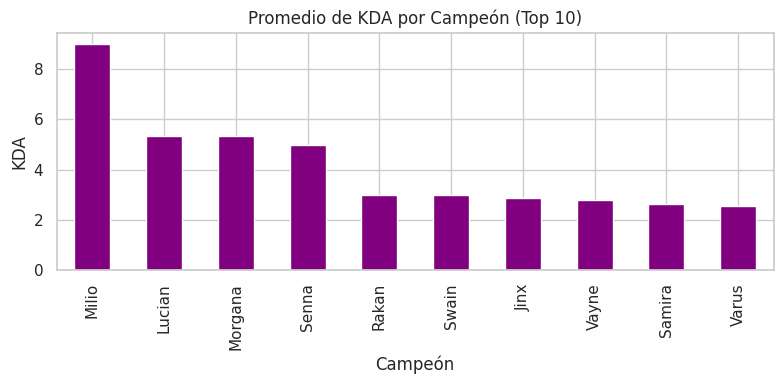

In [ ]:
# 5. Promedio de KDA por campeón (solo top 7 jugados)
kda_champs = df.groupby('champion')['KDA'].mean().sort_values(ascending=False).head(10)
kda_champs.plot(kind='bar', color='purple', figsize=(8, 4))
plt.title("Promedio de KDA por Campeón (Top 10)")
plt.ylabel("KDA")
plt.xlabel("Campeón")
plt.tight_layout()
plt.show()


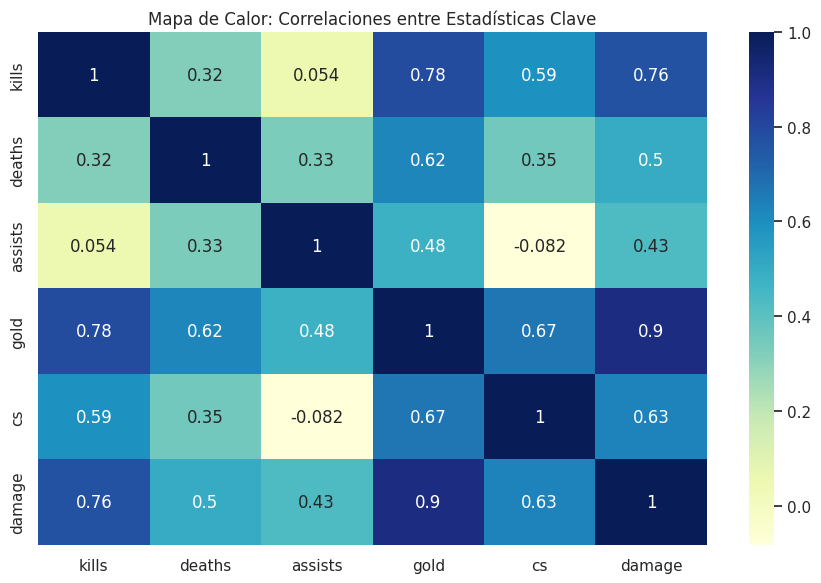

In [ ]:
# 6. Mapa de calor entre oro, daño, muertes, kills, cs
plt.figure(figsize=(9, 6))
sns.heatmap(df[["kills", "deaths", "assists", "gold", "cs", "damage"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Mapa de Calor: Correlaciones entre Estadísticas Clave")
plt.tight_layout()
plt.show()

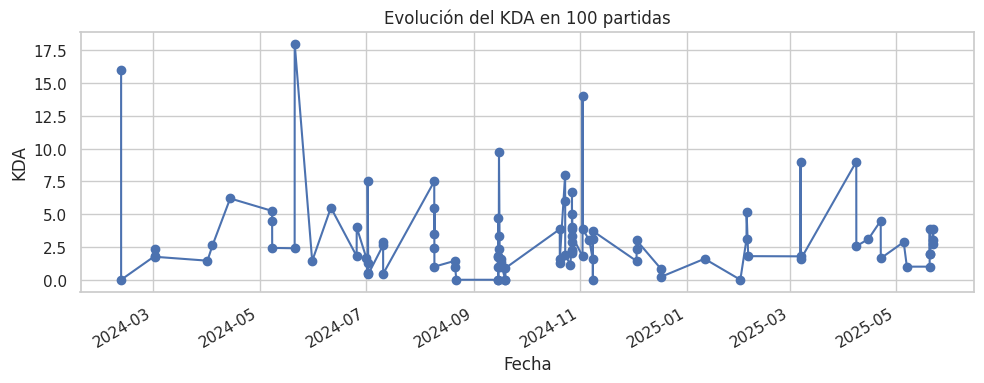

In [ ]:
# KDA a lo largo del tiempo
plt.figure(figsize=(10,4))
df.sort_values("game_end").set_index("game_end")["KDA"].plot(marker='o')
plt.title("Evolución del KDA en 100 partidas")
plt.ylabel("KDA")
plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


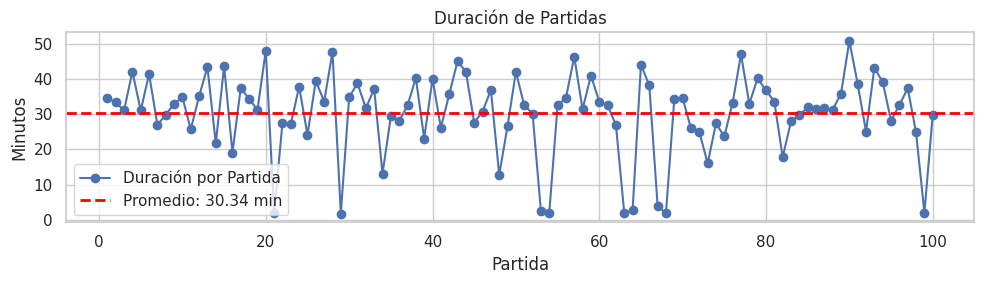

In [ ]:

# Usamos directamente la columna 'duration_min'
duraciones = df['duration_min']

# Calcular duración promedio
promedio = duraciones.mean()

# 📊 Gráfico: Duración de partidas con línea de promedio
plt.figure(figsize=(10, 3))
plt.plot(range(1, len(duraciones) + 1), duraciones, marker='o', label='Duración por Partida')
plt.axhline(promedio, color='red', linestyle='--', linewidth=2, label=f'Promedio: {promedio:.2f} min')

plt.title('Duración de Partidas')
plt.xlabel('Partida')
plt.ylabel('Minutos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




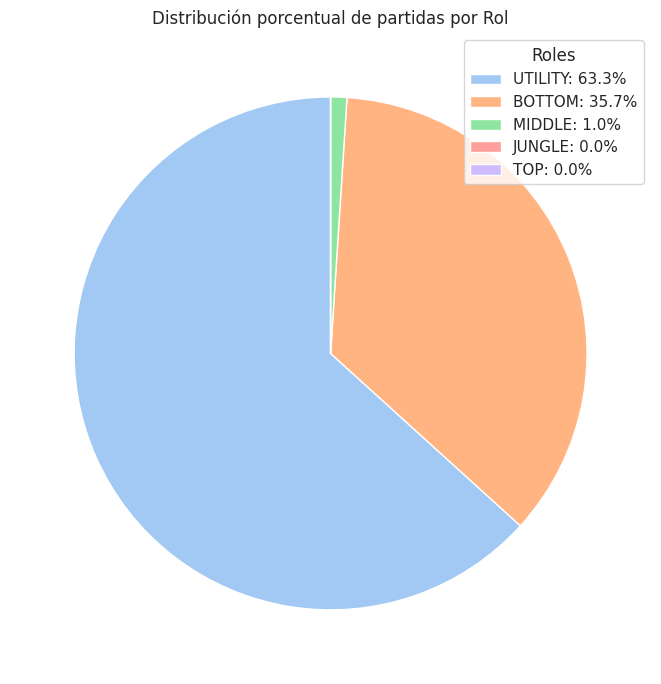

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Roles en orden deseado
orden_roles = ["UTILITY", "BOTTOM", "MIDDLE", "JUNGLE", "TOP"]

# Calcular porcentajes por rol y asegurarse de incluir todos
percentages = df['role'].value_counts(normalize=True).reindex(orden_roles, fill_value=0)

# Reescalar para que la suma sea exactamente 1 (100%)
percentages = percentages / percentages.sum()

# Colores para cada segmento
colors = sns.color_palette("pastel", len(percentages))

plt.figure(figsize=(7, 7))
wedges, texts = plt.pie(percentages, startangle=90, colors=colors)

plt.title("Distribución porcentual de partidas por Rol")
plt.ylabel("")

# Crear etiquetas con nombre del rol + porcentaje (ahora forzadamente suman 100%)
labels = [f"{role}: {percent*100:.1f}%" for role, percent in zip(percentages.index, percentages.values)]

# Añadir la leyenda con las etiquetas
plt.legend(wedges, labels, title="Roles", loc="upper right", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


<ipython-input-11-72af5dfd36d3>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="role", y="value", hue="stat", palette="Set2", order=orden_roles, ci=None)


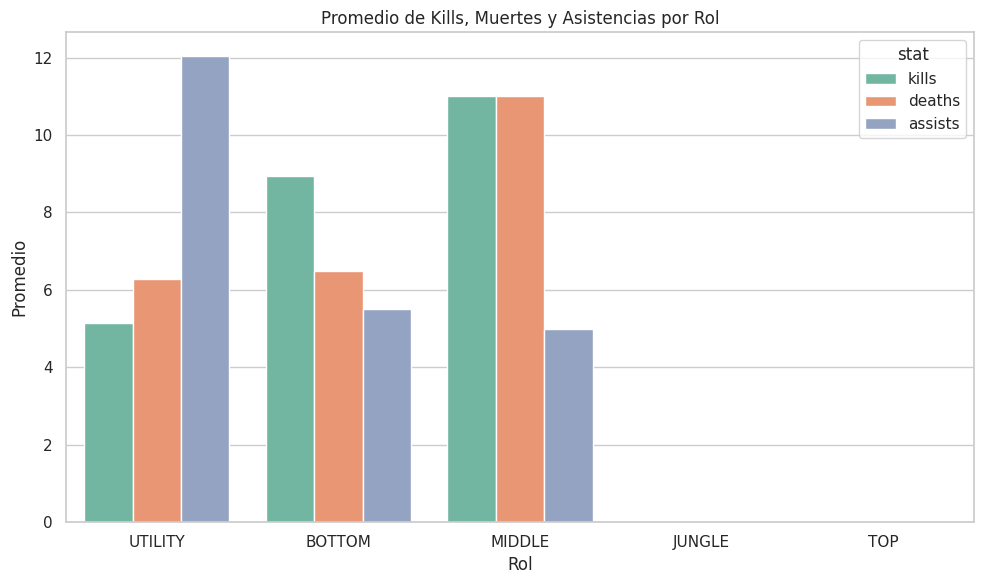

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el orden de roles deseado
orden_roles = ["UTILITY", "BOTTOM", "MIDDLE", "JUNGLE", "TOP"]

# Derretir el DataFrame para graficar kills, muertes y asistencias por rol
df_melted = df.melt(id_vars='role', value_vars=['kills', 'deaths', 'assists'], var_name='stat')

# Asegurar que los roles estén en el orden correcto
df_melted['role'] = pd.Categorical(df_melted['role'], categories=orden_roles, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="role", y="value", hue="stat", palette="Set2", order=orden_roles, ci=None)
plt.title("Promedio de Kills, Muertes y Asistencias por Rol")
plt.ylabel("Promedio")
plt.xlabel("Rol")
plt.tight_layout()
plt.show()


<ipython-input-34-82eb0b3ff2ef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="win_str", y="KDA", palette={"Victoria": "green", "Derrota": "red"})


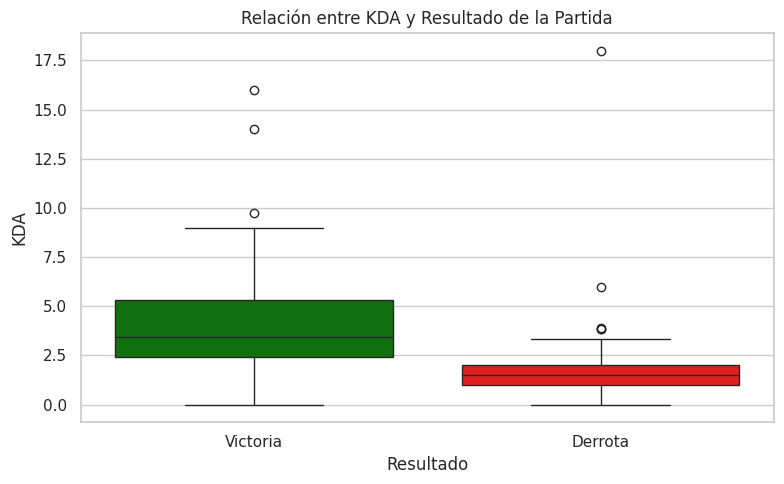

In [ ]:
# 10. Relación entre KDA y resultado (Win) - corregido
plt.figure(figsize=(8, 5))
df["win_str"] = df["win"].map({True: "Victoria", False: "Derrota"})
sns.boxplot(data=df, x="win_str", y="KDA", palette={"Victoria": "green", "Derrota": "red"})
plt.title("Relación entre KDA y Resultado de la Partida")
plt.xlabel("Resultado")
plt.ylabel("KDA")
plt.tight_layout()
plt.show()

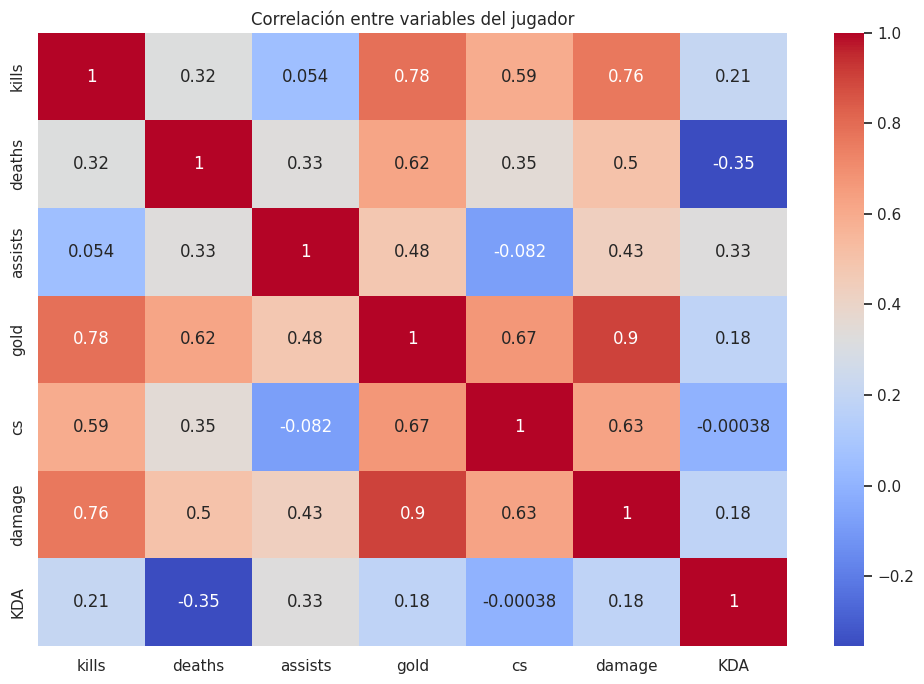

In [ ]:
# Gráfico de calor de correlaciones
plt.figure(figsize=(10,7))
sns.heatmap(df[["kills", "deaths", "assists", "gold", "cs", "damage", "KDA"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables del jugador")
plt.tight_layout()
plt.show()

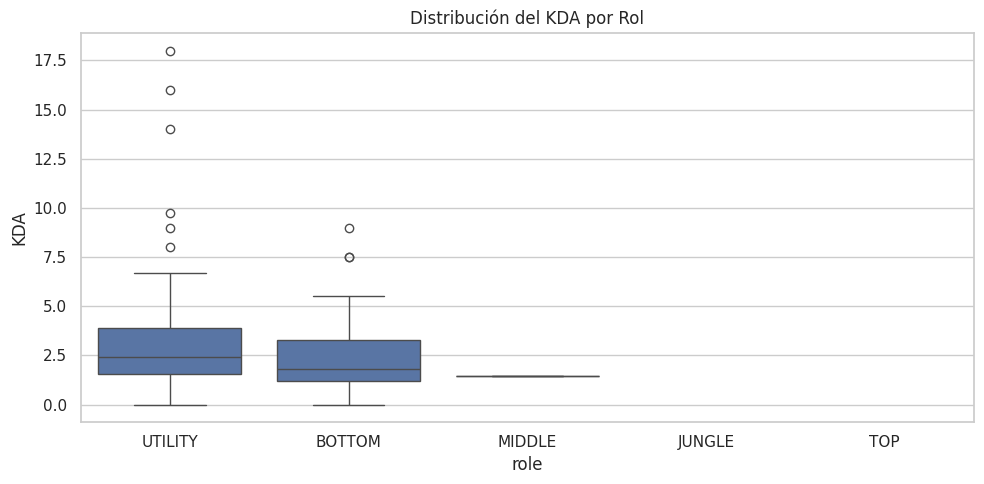

In [ ]:
# KDA por rol
plt.figure(figsize=(10,5))
sns.boxplot(x="role", y="KDA", data=df, order=["UTILITY", "BOTTOM", "MIDDLE", "JUNGLE", "TOP"])
plt.title("Distribución del KDA por Rol")
plt.tight_layout()
plt.show()


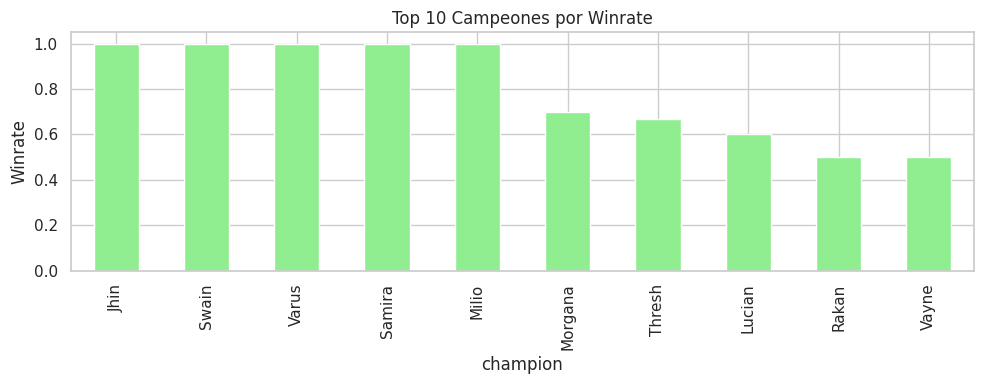

In [ ]:
# Winrate por campeón
plt.figure(figsize=(10,4))
df.groupby("champion")["win"].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Campeones por Winrate")
plt.ylabel("Winrate")
plt.tight_layout()
plt.show()

<ipython-input-50-4be88d7c9a0a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_damage.index, y=top_damage.values, palette="viridis")


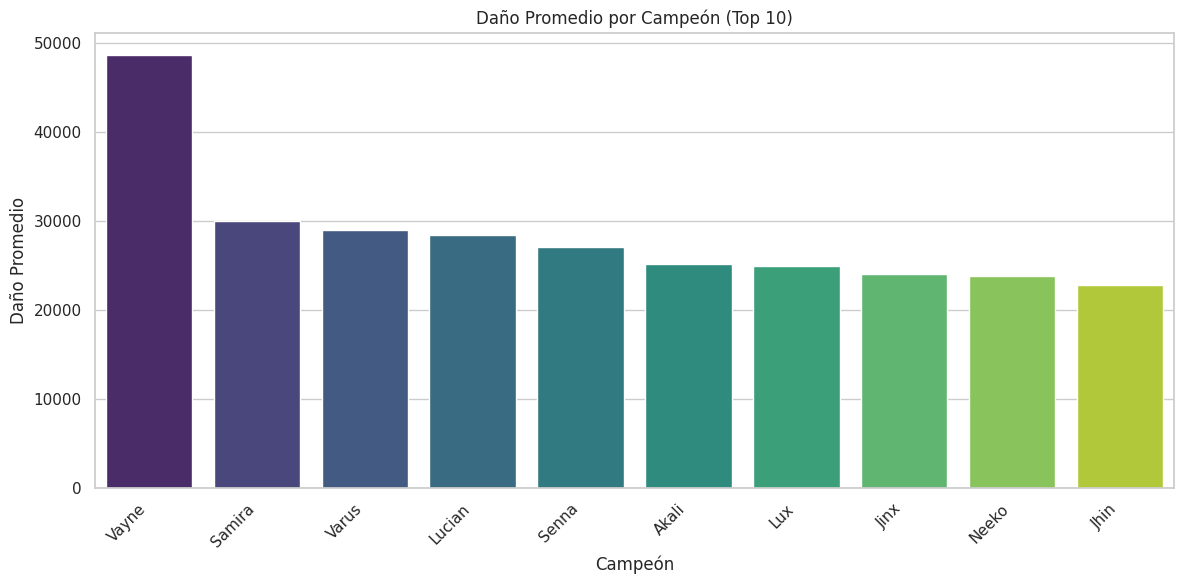

In [ ]:
# Calcular daño promedio por campeón
damage_promedio = df.groupby('champion')['damage'].mean().sort_values(ascending=False)

# Mostrar los primeros 10 campeones con más daño promedio para no saturar el gráfico
top_damage = damage_promedio.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_damage.index, y=top_damage.values, palette="viridis")
plt.title("Daño Promedio por Campeón (Top 10)")
plt.xlabel("Campeón")
plt.ylabel("Daño Promedio")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

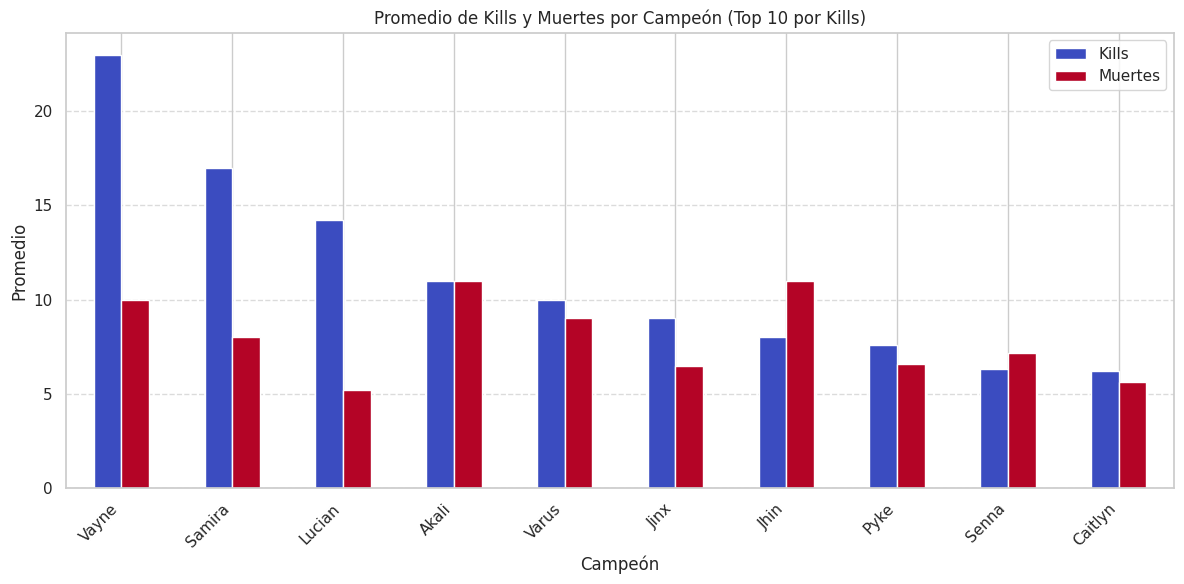

In [ ]:
# Agrupar y calcular promedios
promedios = df.groupby('champion')[['kills', 'deaths']].mean()

# Ordenar por promedio de kills (puedes cambiarlo a 'deaths' si prefieres)
top_champions = promedios.sort_values('kills', ascending=False).head(10)

# Gráfico de barras con kills y deaths
plt.figure(figsize=(12, 6))
top_champions.plot(kind='bar', figsize=(12, 6), colormap="coolwarm")

plt.title("Promedio de Kills y Muertes por Campeón (Top 10 por Kills)")
plt.ylabel("Promedio")
plt.xlabel("Campeón")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(["Kills", "Muertes"])
plt.show()


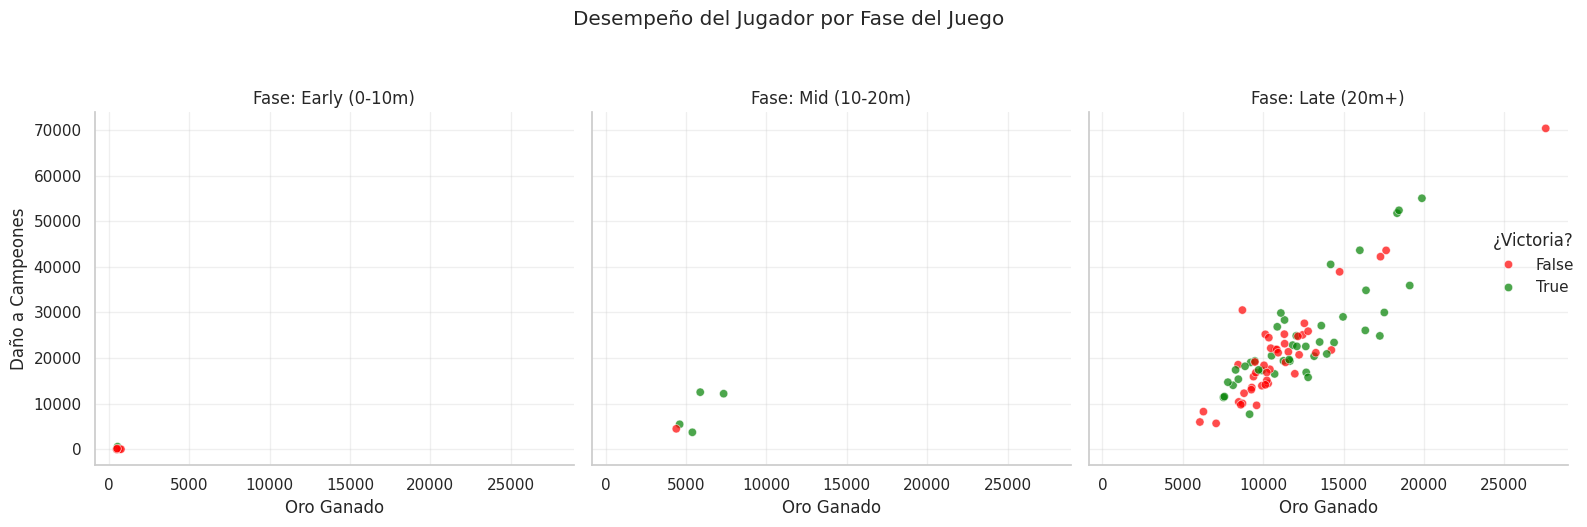

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna de fase del juego según duración
df['game_phase'] = pd.cut(
    df['duration_min'],
    bins=[0, 10, 20, 90],
    labels=['Early (0-10m)', 'Mid (10-20m)', 'Late (20m+)']
)

# Crear FacetGrid para analizar daño infligido vs oro por fase del juego
g = sns.FacetGrid(
    df,
    col='game_phase',
    height=5,
    aspect=1
)

g.map_dataframe(
    sns.scatterplot,
    x='gold',
    y='damage',
    hue='win',
    palette={True: 'green', False: 'red'},
    alpha=0.7
)

# Ajustes del gráfico
for ax, phase in zip(g.axes.flat, g.col_names):
    ax.set_title(f'Fase: {phase}')
    ax.grid(alpha=0.3)

g.set_axis_labels('Oro Ganado', 'Daño a Campeones')
g.add_legend(title="¿Victoria?")
g.fig.suptitle('Desempeño del Jugador por Fase del Juego', y=1.05)
plt.tight_layout()
plt.show()
